In [1]:
library(tidyverse)
library(MASS)
library(glmnet)
library(rlist)
library(superheat)

source('./simulation_utils.R')

options(repr.plot.width=6, repr.plot.height=4) # plot sizes in this notebook


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: foreach

Attaching package: ‘foreach’

The following objects are masked from ‘package:purrr’:

    accumulate, when

Loaded glmnet 2.0-16

Loading required package: caret
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [2]:
set.seed(5645654)

In [3]:
save_figs <- FALSE

# Load the fixed parameters 

In [4]:
load('./simulation_results/fixed_params/ridge_fixed_params.RData')

In [5]:
ls()

[1] "beta_full"             "choose_joint_lambda_k" "choose_lambda_cv"     
 [4] "choose_lambda_ic"      "compute_sigma2_hat"    "covar_x"              
 [7] "d"                     "draw_cs_vs_sample"     "draw_linear_responses"
[10] "get_copas_k"           "get_mspe"              "get_slope"            
[13] "get_two_step_cv_k"     "mu_x"                  "n_cs"                 
[16] "n_vs"                  "outfile"               "s"                    
[19] "save_figs"             "x_cs"                  "x_cs_"

In [6]:
beta_full

[1]  0.8205412  0.1242252 -0.2092041  0.4557567  0.5639267  1.6443610
 [7] -1.5951587  1.1211241 -0.6942516 -0.6478944  1.0857461  1.2454429
[13]  0.3810370  1.3814843 -2.0452204  1.0899422 -0.1378971  0.2455839
[19]  1.1033922 -0.2612734

In [7]:
# results directory
results_dir <- './simulation_results/ridge_results2/'

In [8]:
file_list <- list.files(path = results_dir, pattern = '*.rds')

# Lets look at just one case

In [9]:
result1 <- list.load(paste0(results_dir, 'ridge_sim_results_sigma50_sparsity0.rds'))

In [10]:
two_step_results <- 
    list.load(
        paste0('./simulation_results/two_step_ridge_results/ridge_two_step_sim_results_sigma50_sparsity0.rds'))
copas_results <- 
        list.load(
        paste0('./simulation_results/copas_ridge_results/ridge_copas_sim_results_sigma50_sparsity0.rds'))


In [11]:
names(result1)

[1] "ols_slope_cs"         "ols_slope_vs"         "ols_mspe_cs"         
 [4] "ols_mspe_vs"          "lambda_only_slope_cs" "lambda_only_slope_vs"
 [7] "lambda_only_mspe_cs"  "lambda_only_mspe_vs"  "joint_slope_cs"      
[10] "joint_slope_vs"       "joint_mspe_cs"        "joint_mspe_vs"       
[13] "joint_results_mat"    "cv_lambdas"           "sigma"               
[16] "alpha"

In [12]:
names(two_step_results)

[1] "two_step_slope_cs"    "two_step_slope_vs"    "two_step_mspe_cs"    
[4] "two_step_mspe_vs"     "two_step_results_mat" "sigma"               
[7] "alpha"                "s"

In [13]:
n_trials <- length(result1$ols_slope_cs)
print(n_trials)

[1] 500


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


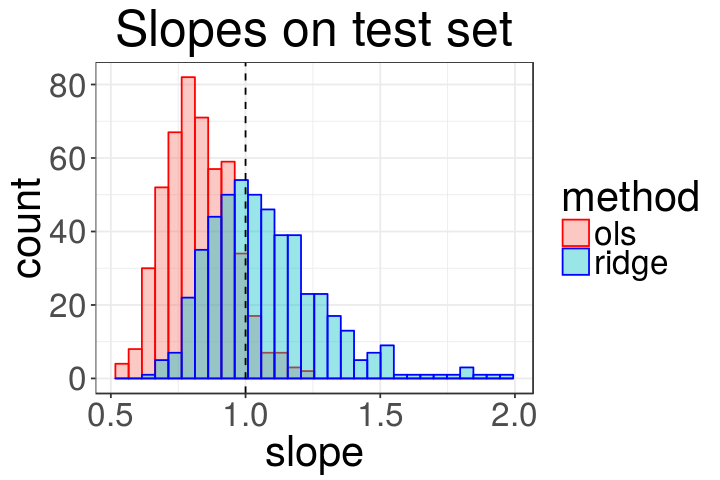

In [26]:
data.frame(ols = result1$ols_slope_vs, 
          ridge = result1$lambda_only_slope_vs,
          joint = result1$joint_slope_vs) %>% 
    gather(key = 'method', value = 'slope') %>% 
    filter(method != 'joint') %>%
    filter(slope < 2) %>%
        ggplot() + geom_histogram(aes(x = slope, color = method, fill = method), 
                                  position = 'identity', alpha = 0.4) + 
            ggtitle('Slopes on test set') + 
            scale_color_manual(values = c('red', 'blue')) + theme_bw() + 
            theme(text = element_text(size = 25), plot.title = element_text(hjust = 0.5)) + 
            geom_vline(xintercept = 1., linetype = 'dashed')

if(TRUE){
    ggsave('../writing/ridge_figures/slope_distr_hist_sigma50.png', width = 9, height = 6)
}


In [15]:
data.frame(ols = result1$ols_slope_vs, 
          ridge = result1$lambda_only_slope_vs,
          joint = result1$joint_slope_vs, 
          two_step = two_step_results$two_step_slope_vs, 
          copas = copas_results$copas_slope_vs) %>% 
    gather(key = 'method', value = 'slope') %>% 
    filter(slope < 2) %>%
        ggplot() + geom_boxplot(aes(method, slope, color = method, fill = method), alpha = 0.4) + 
            ggtitle('Slopes on validation set') + 
            scale_color_manual(values = c('purple', 'green3', 'red', 'blue', 'yellow3')) + 
            scale_fill_manual(values = c('purple', 'green3', 'red', 'blue', 'yellow3')) + 
            theme_bw() + 
            theme(text = element_text(size = 25), plot.title = element_text(hjust = 0.5)) + 
    geom_hline(yintercept = 1., linetype = 'dashed') + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())


if(save_figs){
    ggsave('../writing/ridge_figures/slope_distr_sigma50.png', width = 9, height = 6)
}


ERROR: Error in data.frame(ols = result1$ols_slope_vs, ridge = result1$lambda_only_slope_vs, : arguments imply differing number of rows: 500, 200


In [ ]:
data.frame(ols = result1$ols_mspe_vs, 
          ridge = result1$lambda_only_mspe_vs,
          joint = result1$joint_mspe_vs, 
          two_step = two_step_results$two_step_mspe_vs, 
          copas = copas_results$copas_mspe_vs)  %>% 
    #mutate(lambda_only = lambda_only / ols, joint = joint / ols, two_step = two_step / ols, ols = ols) %>%
    gather(key = 'method', value = 'mspe') %>% 
    # filter(method != 'ols') %>%
        ggplot() + geom_boxplot(aes(method, mspe, color = method, fill = method), alpha = 0.4) +
            ggtitle('MSPEs on validation set') + ylab('MSPE') + 
            scale_color_manual(values = c('purple', 'green3', 'red', 'blue', 'yellow3')) + 
            scale_fill_manual(values = c('purple', 'green3', 'red', 'blue', 'yellow3')) + theme_bw() + 
            theme(text = element_text(size = 25), plot.title = element_text(hjust = 0.5)) + 
    # geom_hline(yintercept = 1., linetype = 'dashed')
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())

if(save_figs){
    ggsave('../writing/ridge_figures/mspe_distr_sigma50.png', width = 9, height = 6)
}


# Load results across sigma

In [15]:
get_results_across_sigma <- function(results_dir, name){
    file_list <- list.files(path = results_dir, pattern = '*.rds')
    
    med <- c()
    upper_quart <- c()
    lower_quart <- c()
    sigmas <- c()
    for(i in 1:length(file_list)){
        result_list <- list.load(paste0(results_dir, file_list[i]))
        result_vec <- result_list[[name]]
        print(length(result_vec))
        sigmas <- c(sigmas, result_list$sigma)
        
        med <- c(med, median(result_vec, na.rm = TRUE))
        upper_quart <- c(upper_quart, quantile(result_vec, 0.75, na.rm = TRUE))
        lower_quart <- c(lower_quart, quantile(result_vec, 0.25, na.rm = TRUE))

        
    }
    return(list(median = med, 
               upper_quart = upper_quart, 
               lower_quart = lower_quart, 
               sigmas = sigmas))
}

In [16]:
copas_result_dir <- './simulation_results/copas_ridge_results/'
copas_slopes <- get_results_across_sigma(copas_result_dir, 'copas_slope_vs')
slope_medians <- c(slope_medians, copas_slopes$median)
sigmas <- c(sigmas, copas_slopes$sigmas)
method <- c(method, rep('Copas', length(copas_slopes$sigmas)))



[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200


ERROR: Error in eval(expr, envir, enclos): object 'slope_medians' not found


In [17]:
names(result1)

[1] "ols_slope_cs"         "ols_slope_vs"         "ols_mspe_cs"         
 [4] "ols_mspe_vs"          "lambda_only_slope_cs" "lambda_only_slope_vs"
 [7] "lambda_only_mspe_cs"  "lambda_only_mspe_vs"  "joint_slope_cs"      
[10] "joint_slope_vs"       "joint_mspe_cs"        "joint_mspe_vs"       
[13] "joint_results_mat"    "cv_lambdas"           "sigma"               
[16] "alpha"

In [18]:
slope_result_names <- c('ols_slope_vs', 
                 'lambda_only_slope_vs', 
                 'joint_slope_vs')

mspe_result_names <- c('ols_mspe_vs', 
                 'lambda_only_mspe_vs', 
                 'joint_mspe_vs')


slope_medians <- c()
slope_upper_quart <- c()
slope_lower_quart <- c()
sigmas <- c()
mspe_medians <- c()
mspe_upper_quart <- c()
mspe_lower_quart <- c()

for(i in 1:length(mspe_result_names)){
    slope_results <- get_results_across_sigma(results_dir, slope_result_names[i])
    slope_medians <- c(slope_medians, slope_results$median)
    slope_upper_quart <- c(slope_upper_quart, slope_results$upper_quart)
    slope_lower_quart <- c(slope_lower_quart, slope_results$lower_quart)
    sigmas <- c(sigmas, slope_results$sigmas)
    
    mspe_results <- get_results_across_sigma(results_dir, mspe_result_names[i])
    mspe_medians <- c(mspe_medians, mspe_results$median)
    mspe_upper_quart <- c(mspe_upper_quart, mspe_results$upper_quart)
    mspe_lower_quart <- c(mspe_lower_quart, mspe_results$lower_quart)

}
n_sigmas <- length(sigmas) / 3

method <- c(rep('ols', n_sigmas), rep('ridge', n_sigmas), rep('joint', n_sigmas))

copas_result_dir <- './simulation_results/copas_ridge_results/'
copas_slopes <- get_results_across_sigma(copas_result_dir, 'copas_slope_vs')
slope_medians <- c(slope_medians, copas_slopes$median)
sigmas <- c(sigmas, copas_slopes$sigmas)
method <- c(method, rep('Copas', length(copas_slopes$sigmas)))

two_step_dir <- './simulation_results/two_step_ridge_results/'
two_step_slopes <- get_results_across_sigma(two_step_dir, 'two_step_slope_vs')
slope_medians <- c(slope_medians, two_step_slopes$median)
sigmas <- c(sigmas, two_step_slopes$sigmas)
method <- c(method, rep('two_step', length(two_step_slopes$sigmas)))




slope_results_df <- data.frame(sigma = sigmas, 
                              median_slope = slope_medians, 
                              # upper_q = slope_upper_quart, 
                              # lower_q = slope_lower_quart, 
                              method = method)

# mspe_results_df <- data.frame(sigma = sigmas, 
#                               median_mspe = mspe_medians, 
#                               # upper_q = mspe_upper_quart, 
#                               # lower_q = mspe_lower_quart, 
#                               method = method)

[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 500
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 100
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200


In [19]:
copas_result_dir <- './simulation_results/copas_ridge_results/'
copas_mspes <- get_results_across_sigma(copas_result_dir, 'copas_mspe_vs')
mspe_medians <- c(mspe_medians, copas_mspes$median)
# sigmas <- c(sigmas, copas_mspes$sigmas)
# method <- c(method, rep('Copas', length(copas_mspes$sigmas)))

two_step_dir <- './simulation_results/two_step_ridge_results/'
two_step_mspes <- get_results_across_sigma(two_step_dir, 'two_step_mspe_vs')
mspe_medians <- c(mspe_medians, two_step_mspes$median)
# sigmas <- c(sigmas, two_step_slopes$sigmas)
# method <- c(method, rep('two_step', length(two_step_mspes$sigmas)))


[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 100
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200
[1] 200


In [20]:
mspe_results_df <- data.frame(sigma = sigmas, 
                              median_mspe = mspe_medians, 
                              # upper_q = mspe_upper_quart, 
                              # lower_q = mspe_lower_quart, 
                              method = method)

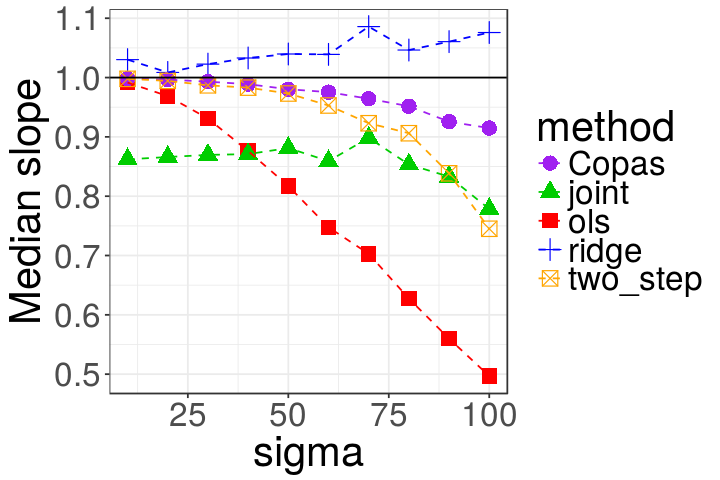

In [21]:
slope_results_df %>% ggplot(aes(x = sigmas, y = median_slope)) + 
    geom_point(aes(color = method, shape = method), size = 4) + 
    geom_line(aes(color = method), linetype = 'dashed') + 
    scale_color_manual(values = c('purple', 'green3', 'red', 'blue', 'orange')) + 
    ylab('Median slope') + xlab('sigma') + geom_hline(yintercept = 1.0) + 
    theme_bw() + 
    theme(text = element_text(size = 25), plot.title = element_text(hjust = 0.5))# + 
    # geom_errorbar(aes(ymin = lower_q, ymax = upper_q, color = method))

if(save_figs){
    ggsave('../writing/ridge_figures/slopes_over_sigmas.png', width = 9, height = 6)
}


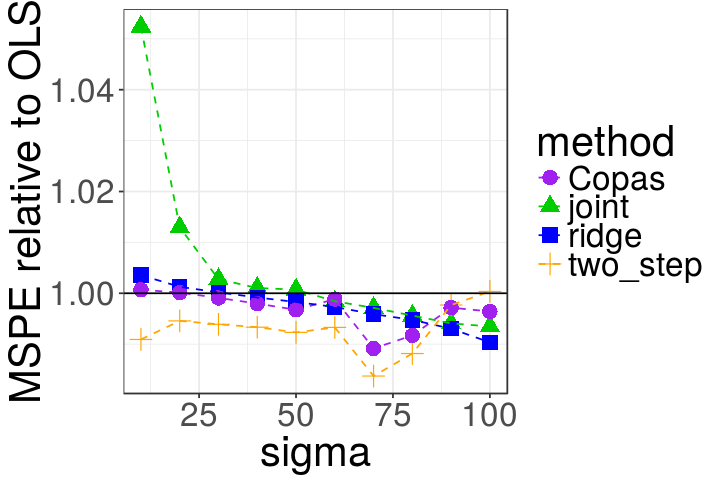

In [23]:
mspe_results_df %>% 
    spread(method, median_mspe) %>% 
    mutate(joint = joint / ols, ridge = ridge / ols, Copas = Copas / ols, 
           two_step = two_step / ols, ols = ols / ols) %>% 
    gather(key = 'method', value = 'median_mspe', joint, ridge, ols, two_step, Copas) %>% 
    filter(method != 'ols') %>%
    ggplot(aes(x = sigma, y = median_mspe)) + 
        geom_point(aes(color = method, shape = method), size = 4) + 
        geom_line(aes(color = method), linetype = 'dashed') + 
    scale_color_manual(values = c('purple', 'green3', 'blue', 'orange')) + 
        geom_hline(yintercept = 1.0) + 
        ylab('MSPE relative to OLS') + theme_bw() + 
    theme(text = element_text(size = 25), plot.title = element_text(hjust = 0.5))# + 
        # geom_errorbar(aes(ymin = lower_q, ymax = upper_q, color = method))

if(save_figs){
    ggsave('../writing/ridge_figures/mspe_over_sigmas.png', width = 9, height = 6)
}
